In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import joblib

In [0]:
Data = pd.read_csv('/content/diabetes.csv')

data = Data.copy(deep=True)


## Data Decription:

1.   Pregnancies: Number of times pregnant
2.   Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test - milligrams per deciliter (mg/dL) Normal report around 200 mg/dL 
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm) (an indicator of bodyfat)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)2)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
8. Age: Age (years)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

    
    
    
    
   
    
    


In [146]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [147]:
# No null values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [148]:
# No duplicate values
data.duplicated().sum()

0

In [149]:
# Descriptive Statistics: 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
# replace the values of 0 with median value as Insulin has many outliers as the mean - median value is very high
m = data.Insulin == 0

data['Insulin'] = data.where(~m,other=(data['Insulin'].median()))

In [151]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,1.0,28.1,0.167,21,0
4,0,137,40,35,0.0,43.1,2.288,33,1


In [42]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,0.281270,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,-0.021090,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,-0.064659,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,-0.536547,0.392573,0.183928,-0.113970,0.074752
Insulin,0.281270,-0.021090,-0.064659,-0.536547,1.000000,-0.129167,-0.164088,0.279286,0.070804
BMI,0.017683,0.221071,0.281805,0.392573,-0.129167,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,-0.164088,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,0.279286,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.070804,0.292695,0.173844,0.238356,1.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


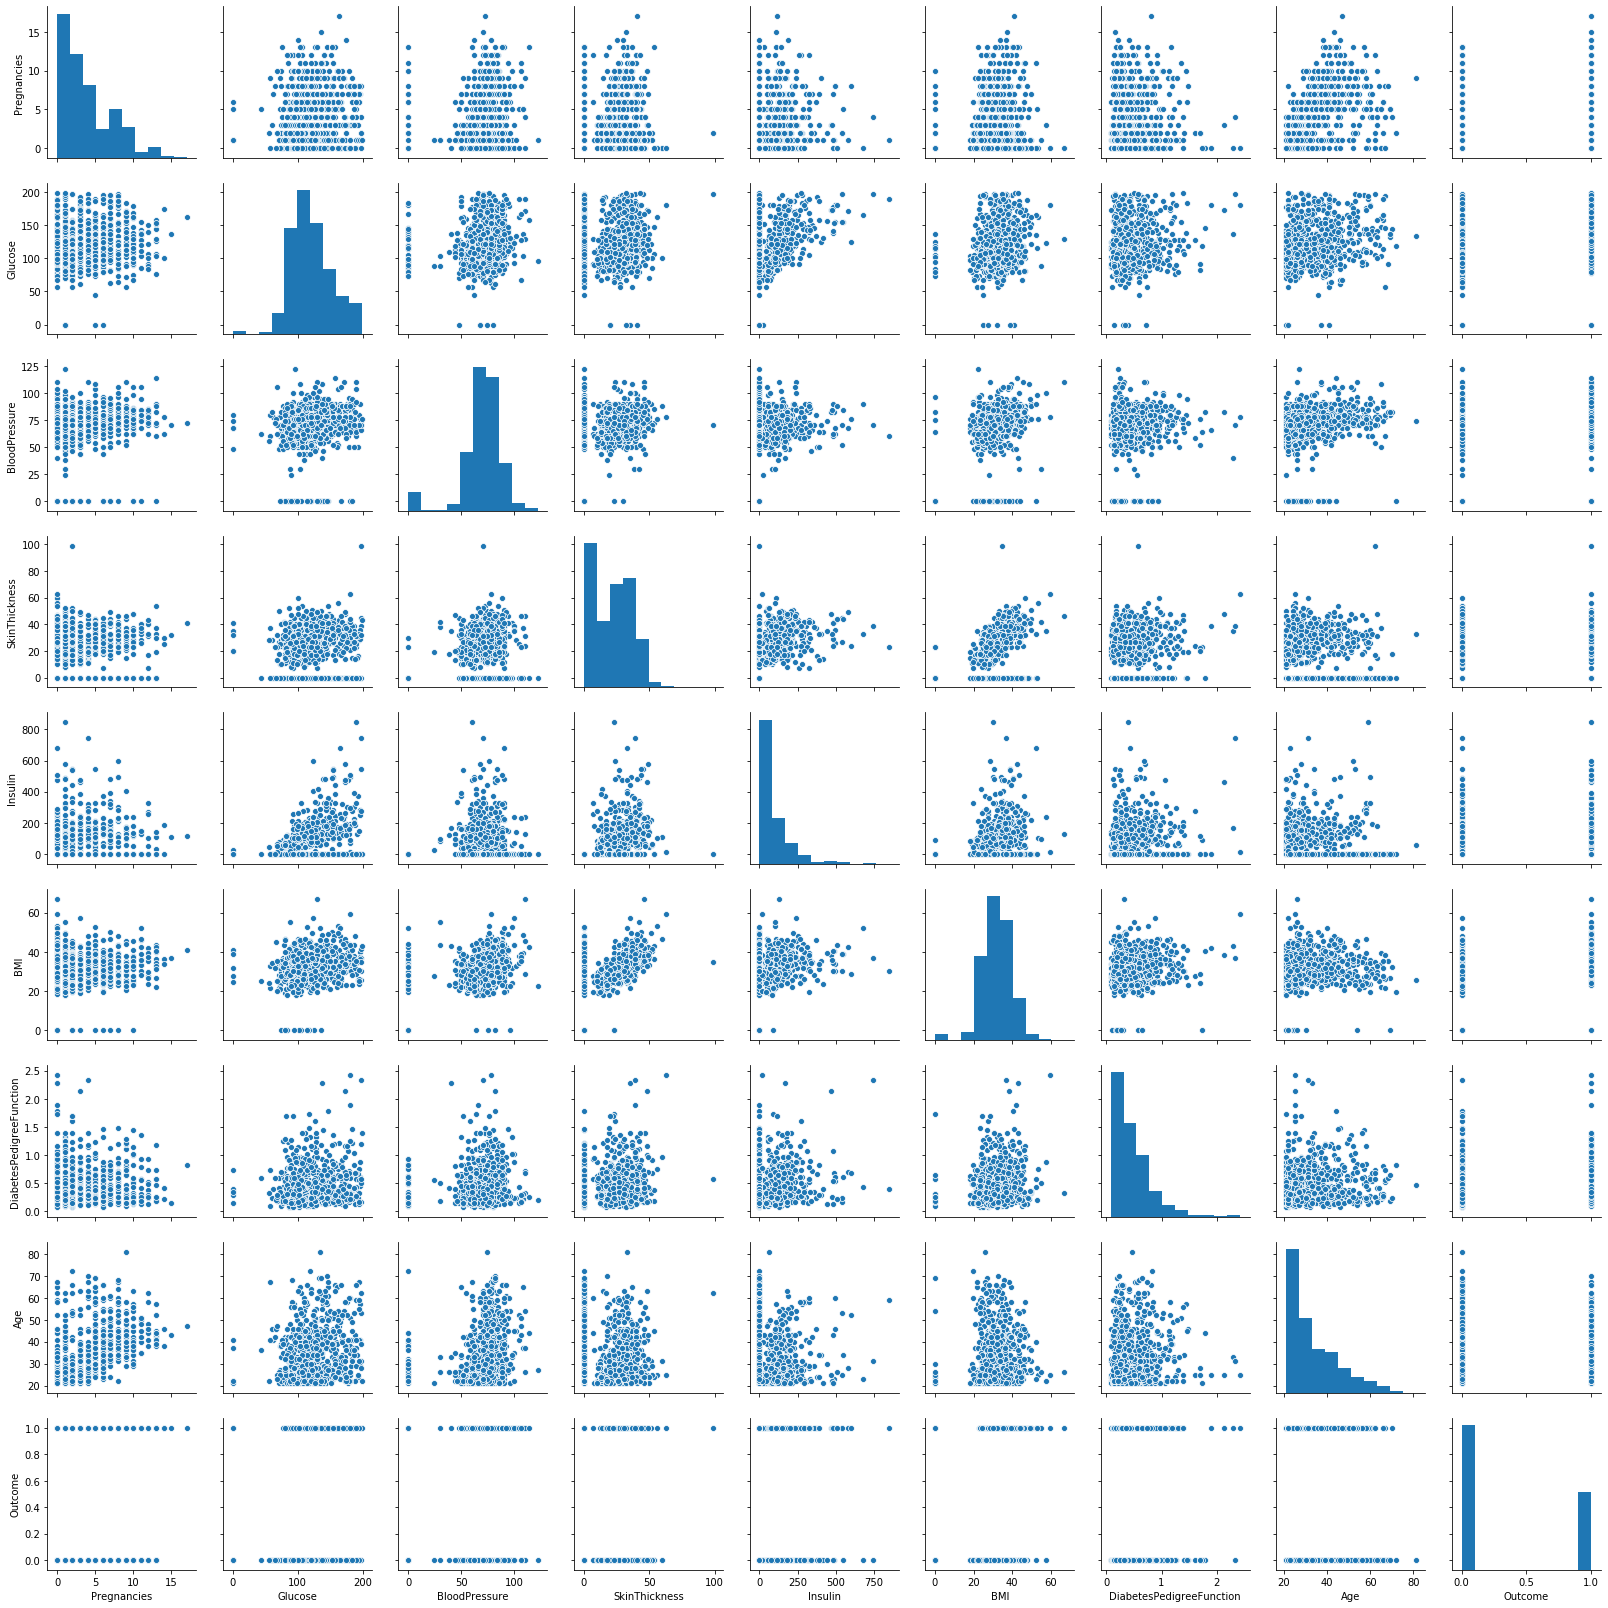

In [0]:
# To understand the relationship between many features
sns.pairplot(data)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                      0.281270 -0.021090  ...  0.279286  0.070804
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


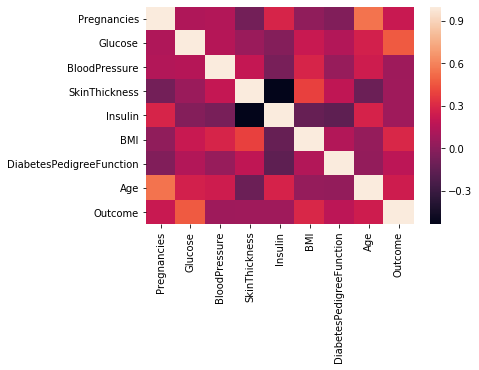

In [152]:
# A better way to understand the relationships is using a heat map.
corr = data.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

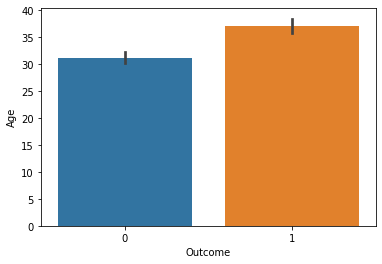

In [0]:
sns.barplot(data=data, x='Outcome',y='Age')

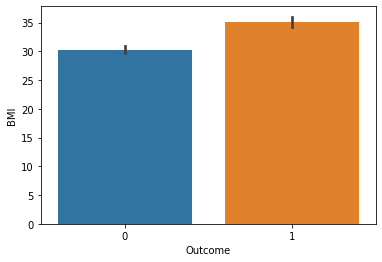

In [0]:
sns.barplot(data=data, x='Outcome',y='BMI')

In [0]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,16.539062,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,13.803394,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,2.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,12.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,30.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,30.500000,67.100000,2.420000,81.000000,1.000000


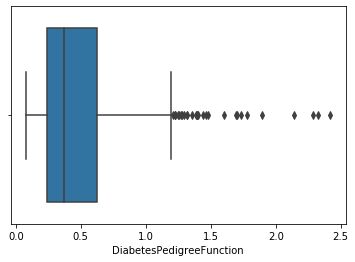

In [0]:
sns.boxplot('DiabetesPedigreeFunction', data=data)

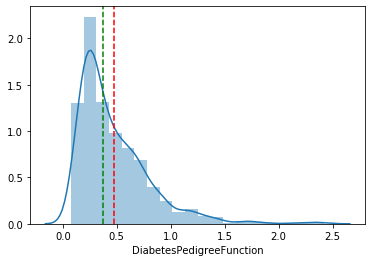

In [0]:
mean = data['DiabetesPedigreeFunction'].mean()
median = data['DiabetesPedigreeFunction'].median()

f, ax_hist = plt.subplots(1)

# sns.distplot(data['Insulin'], bins=20, ax=ax_hist)
sns.distplot(data['DiabetesPedigreeFunction'], bins=20, ax=ax_hist)

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')

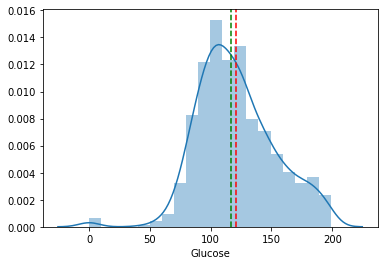

In [0]:
# mean = data['Insulin'].mean()
# median = data['Insulin'].median()

mean = data['Glucose'].mean()
median = data['Glucose'].median()


f, ax_hist = plt.subplots(1)

# sns.distplot(data['Insulin'], bins=20, ax=ax_hist)
sns.distplot(data['Glucose'], bins=20, ax=ax_hist)

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')

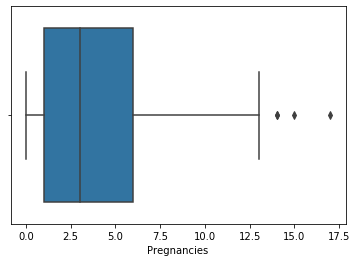

In [0]:
# plotting Multiple Box plots to understand the IQR and detect outliers:

sns.boxplot(data['Pregnancies'])
# sns.boxplot(data['Glucose'])
# sns.boxplot(data['BloodPressure'])
# sns.boxplot(data['SkinThickness'])
# sns.boxplot(data['Insulin'])
# sns.boxplot(data['BMI'])
# sns.boxplot(data['DiabetesPedigreeFunction'])
# sns.boxplot(data['Age'])


In [0]:
# Splitting the data into 80% train data and 20% test data

train,test = train_test_split(data, random_state=42, test_size=0.2)

In [154]:
train.shape

(614, 9)

In [0]:
train_x = train.drop('Outcome', axis=1) 
train_y = train['Outcome']

In [0]:
test_x = test.drop('Outcome', axis=1) 
test_y = test['Outcome']

In [0]:
# Data Standardization:

Stdscalar = StandardScaler()

train_x = Stdscalar.fit_transform(train_x)
test_x = Stdscalar.fit_transform(test_x)

##Naive Bayes Model:

In [158]:
nb_m = GaussianNB()

nb_m.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
prediction_train = nb_m.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [160]:
print('Naive Bayes: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

Naive Bayes: 
Accuracy over Training set: 0.754071661237785


In [161]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

F1 score over Training set: 0.6326034063260341
Precision over Training set: 0.6565656565656566
Recall rate over Training set: 0.6103286384976526
Confusion Matrix over Training set: [[333  68]
 [ 83 130]]


In [0]:
y_probaNB = cross_val_predict( nb_m, train_x, train_y, cv=3, method="predict_proba")
y_scores_nb = y_probaNB[:,1] 
fpr_nb, tpr_nb, threshold_nb = roc_curve(train_y, y_scores_nb)
roc_auc_score_nb = roc_auc_score(train_y, y_scores_nb)

ROC AUC SCORE over the Training set is found to be 0.81.

In [163]:
roc_auc_score_nb

0.8100991652324587

## Logistic Regression Model

In [0]:
lr_m = LogisticRegression()

In [166]:
lr_m.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
prediction_train = lr_m.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [168]:
print('Logistic Regression: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

Logistic Regression: 
Accuracy over Training set: 0.7736156351791531


In [169]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

F1 score over Training set: 0.6370757180156659
Precision over Training set: 0.7176470588235294
Recall rate over Training set: 0.5727699530516432
Confusion Matrix over Training set: [[353  48]
 [ 91 122]]


In [0]:
y_probaLR = cross_val_predict( lr_m, train_x, train_y, cv=3, method="predict_proba")
y_scores_lr = y_probaLR[:,1] 
fpr_lr, tpr_lr, threshold_lr = roc_curve(train_y, y_scores_lr)
roc_auc_score_lr = roc_auc_score(train_y, y_scores_lr)

ROC AUC SCORE over the Training set is found to be 0.83.

In [171]:
roc_auc_score_lr

0.8387950312013394

Text(0.5, 0, 'Importance')

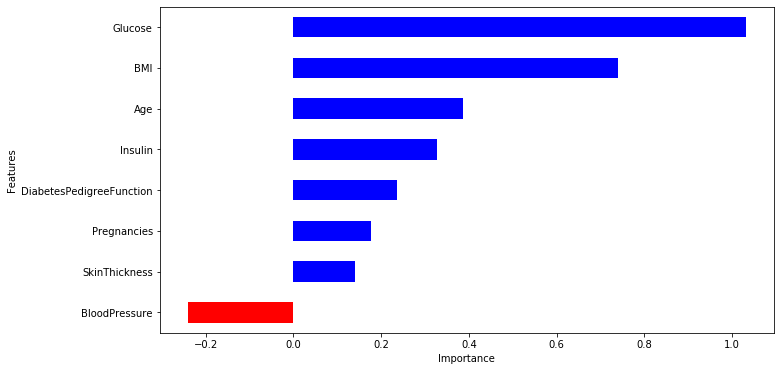

In [172]:
# Check out the Important features which contribute alot to our prediction:

coeff = list(lr_m.coef_[0])
labels = list(train.drop('Outcome', axis=1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [173]:
# Saving the Model:

joblib.dump(lr_m,'LR_model.pkl')

['LR_model.pkl']

##From the above figure, we can draw the following conclusions.

1.Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!

2.Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).
    
3.Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

## KNN Classifier Model

In [0]:
knn_m = KNeighborsClassifier(n_neighbors=3)

In [176]:
knn_m.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
prediction_train = knn_m.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [178]:
print('KNN Classifier: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

KNN Classifier: 
Accuracy over Training set: 0.8566775244299675


In [179]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

F1 score over Training set: 0.7810945273631841
Precision over Training set: 0.8306878306878307
Recall rate over Training set: 0.7370892018779343
Confusion Matrix over Training set: [[369  32]
 [ 56 157]]


In [0]:
y_probaKNN = cross_val_predict( knn_m, train_x, train_y, cv=3, method="predict_proba")
y_scores_knn = y_probaKNN[:,1] 
fpr_knn, tpr_knn, threshold_knn = roc_curve(train_y, y_scores_knn)
roc_auc_score_knn = roc_auc_score(train_y, y_scores_knn)

ROC AUC SCORE over the Training set is found to be 0.74.

In [181]:
roc_auc_score_knn

0.7437509512603468

##SGD Classifier Model

In [0]:
sgd_m = SGDClassifier(random_state=42)

In [183]:
sgd_m.fit(train_x, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
prediction_train = sgd_m.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [185]:
print('SGD Classifier: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

SGD Classifier: 
Accuracy over Training set: 0.749185667752443


In [186]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('SGD Classifier: ')

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

SGD Classifier: 
F1 score over Training set: 0.5625
Precision over Training set: 0.7122302158273381
Recall rate over Training set: 0.4647887323943662
Confusion Matrix over Training set: [[361  40]
 [114  99]]


In [0]:
y_scores_sgdC = sgd_m.decision_function(train_x)

In [0]:
roc_auc_sgdC = roc_auc_score(train_y, y_scores_sgdC)

ROC AUC SCORE over the Training set is found to be 0.81.

In [189]:
roc_auc_sgdC

0.8148642478311264

## Random Forest CLassifier Model

In [0]:
model = RandomForestClassifier()

In [191]:
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
prediction_train = model.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [193]:
print('Random Forest Classifier: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

Random Forest Classifier: 
Accuracy over Training set: 1.0


In [194]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

F1 score over Training set: 1.0
Precision over Training set: 1.0
Recall rate over Training set: 1.0
Confusion Matrix over Training set: [[401   0]
 [  0 213]]


In [0]:
y_probaForest = cross_val_predict( model, train_x, train_y, cv=3, method="predict_proba")
y_scores_rf = y_probaForest[:,1] 
fpr_rf, tpr_rf, threshold_rf = roc_curve(train_y, y_scores_rf)
roc_auc_score_rf = roc_auc_score(train_y, y_scores_rf)

ROC AUC SCORE over the Training set is found to be 0.83.

In [196]:
roc_auc_score_rf

0.8351597531991617

## SVM Classifier Model

In [0]:
model = SVC()

In [198]:
model.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
prediction_train = model.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [200]:
print('Support Vector Classifier: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

Support Vector Classifier: 
Accuracy over Training set: 0.8241042345276873


In [201]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

F1 score over Training set: 0.7258883248730965
Precision over Training set: 0.7900552486187845
Recall rate over Training set: 0.6713615023474179
Confusion Matrix over Training set: [[363  38]
 [ 70 143]]


In [0]:
y_probaSVC = cross_val_predict( model, train_x, train_y, cv=3, method="decision_function")
y_scores_svm = list(y_probaSVC)
fpr_svm, tpr_svm, threshold_svm = roc_curve(train_y, y_scores_svm)
roc_auc_score_svm = roc_auc_score(train_y, y_scores_svm)

ROC AUC SCORE over the Training set is found to be 0.83.

In [203]:
roc_auc_score_svm

0.8314191048201093

## Gradient Boosting Classifier Model

In [205]:
GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(train_x,train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
prediction_train = GB_classifier.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [207]:
print('Gradiant Boosting Classifier: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

Gradiant Boosting Classifier: 
Accuracy over Training set: 0.9299674267100977


In [208]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

F1 score over Training set: 0.8933002481389577
Precision over Training set: 0.9473684210526315
Recall rate over Training set: 0.8450704225352113
Confusion Matrix over Training set: [[391  10]
 [ 33 180]]


In [0]:
y_probaGBC = cross_val_predict( GB_classifier, train_x, train_y, cv=5, method="predict_proba")
y_scores_GBC = y_probaGBC[:,1] 
fpr_GBC, tpr_GBC, threshold_GBC = roc_curve(train_y, y_scores_GBC)
roc_auc_score_GBC = roc_auc_score(train_y, y_scores_GBC)

ROC AUC SCORE over the Training set is found to be 0.84.

In [210]:
roc_auc_score_GBC

0.8423307927364686

## XG Boost Classifier Model

In [211]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
prediction_train = xgb_classifier.predict(train_x)

accuracy_train = accuracy_score(train_y, prediction_train)

precision_train = precision_score(train_y, prediction_train)

recall_train = recall_score(train_y, prediction_train)

In [213]:
print('XG Boosting Classifier: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

XG Boosting Classifier: 
Accuracy over Training set: 0.9169381107491856


In [214]:
f1_train = f1_score(train_y, prediction_train)

confusion_matrix_train = confusion_matrix(train_y, prediction_train) 

print('F1 score over Training set: {}'.format(f1_train))

print('Precision over Training set: {}'.format(precision_train))

print('Recall rate over Training set: {}'.format(recall_train))

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

F1 score over Training set: 0.8753056234718826
Precision over Training set: 0.9132653061224489
Recall rate over Training set: 0.8403755868544601
Confusion Matrix over Training set: [[384  17]
 [ 34 179]]


In [0]:
y_probaXgGC = cross_val_predict( xgb_classifier, train_x, train_y, cv=5, method="predict_proba")
y_scores_XgGC = y_probaXgGC[:,1] 
fpr_XgGC, tpr_XgGC, threshold_XgGC = roc_curve(train_y, y_scores_XgGC)
roc_auc_score_XgGC = roc_auc_score(train_y, y_scores_XgGC)

ROC AUC SCORE over the Training set is found to be 0.84.

In [216]:
roc_auc_score_XgGC

0.8446606488473651

In [217]:
# Saving the Model:

joblib.dump(xgb_classifier,'XGBoost_model.pkl')

['XGBoost_model.pkl']

Applying Grid Search for some Hyperparameter tuning

In [0]:
param_grid = [
              {'n_estimators':[3,10,20,], 'max_features':[1,4,5,6,7]},
              {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[1,4,5,6]}
]

In [0]:
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=5, scoring='f1', return_train_score=True)

In [221]:
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_features': [1, 4, 5, 6, 7],
                          'n_estimators': [3, 10, 20]},
                         {'bootstrap': [False], 'max_features'

In [222]:
grid_search.best_params_

{'max_features': 1, 'n_estimators': 20}

In [0]:
cvres = grid_search.cv_results_

In [224]:
for f1_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(f1_score,params)

0.6344754963742305 {'max_features': 1, 'n_estimators': 3}
0.6339078425791869 {'max_features': 1, 'n_estimators': 10}
0.6382591274424305 {'max_features': 1, 'n_estimators': 20}
0.6344754963742305 {'max_features': 4, 'n_estimators': 3}
0.6339078425791869 {'max_features': 4, 'n_estimators': 10}
0.6382591274424305 {'max_features': 4, 'n_estimators': 20}
0.6344754963742305 {'max_features': 5, 'n_estimators': 3}
0.6339078425791869 {'max_features': 5, 'n_estimators': 10}
0.6382591274424305 {'max_features': 5, 'n_estimators': 20}
0.6344754963742305 {'max_features': 6, 'n_estimators': 3}
0.6339078425791869 {'max_features': 6, 'n_estimators': 10}
0.6382591274424305 {'max_features': 6, 'n_estimators': 20}
0.6344754963742305 {'max_features': 7, 'n_estimators': 3}
0.6339078425791869 {'max_features': 7, 'n_estimators': 10}
0.6382591274424305 {'max_features': 7, 'n_estimators': 20}
0.6344754963742305 {'bootstrap': False, 'max_features': 1, 'n_estimators': 3}
0.6339078425791869 {'bootstrap': False, 'm

Selecting the final model from the Grid Search Best Estimator

In [0]:
final_model = grid_search.best_estimator_

In [0]:
final_predictions = final_model.predict(train_x)

In [0]:
accuracy_test = accuracy_score(train_y, final_predictions)

precision_test = precision_score(train_y, final_predictions)

recall_test = recall_score(train_y, final_predictions)

In [229]:
print('XG Boosting Classifier: ')
print('Accuracy over Test set: {}'.format(accuracy_train))

XG Boosting Classifier: 
Accuracy over Test set: 0.9169381107491856


In [0]:
y_probaXgGC = cross_val_predict( final_model, train_x, train_y, cv=5, method="predict_proba")
y_scores_XgGC = y_probaXgGC[:,1] 
fpr_XgGC, tpr_XgGC, threshold_XgGC = roc_curve(train_y, y_scores_XgGC)
roc_auc_score_XgGC = roc_auc_score(train_y, y_scores_XgGC)

ROC AUC SCORE over the Training set is found to be 0.84.

In [231]:
roc_auc_score_XgGC

0.8419268729584489

In [232]:
# Saving Model

joblib.dump(final_model, 'Final_xgModel.pkl')

['Final_xgModel.pkl']